<img align = 'center' src="../../Images/ML_SWE.jpg" alt = '.../Images/' width = '1000'/>

# Long Short Term Memory

**Savalan Neisary - The Univeristy of Alabama**

* I'm a second-year Ph.D. student, and I'm a data science and ML nerd trying to use it in hydrological modeling and hydrological drought and streamflow predictions. 

* My goal for participating in this hackweek is to learn how to implement ML/DL methods in snow-water equivalent modeling and what kind of inputs I should use with these models. 

* We implemented LSTM and 1D-CNN algorithms during the past few days, and the results showed that CNN has better results than LSTM.


In [2]:
import os
import lstm_model as bls
import sys
sys.path.insert(0, '..') #sys allows for the .ipynb file to connect to the shared folder files
from shared_scripts import DataProcess
cwd = os.getcwd()

2024-02-28 08:59:43.593418: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2024-02-28 08:59:43.593545: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [3]:
#Define hold out year
HOY = 2019
modelname = "LSTM"
Region_list = [ 'N_Sierras', 'S_Sierras_High', 'S_Sierras_Low']
RegionTrain, RegionTest, RegionObs_Train, RegionObs_Test, RegionTest_notScaled = DataProcess.DataProcess(HOY, modelname, Region_list)

Processing training dataframes for each region
N_Sierras
Model/N_Sierras/N_Sierras_SWEmax.npy
S_Sierras_High
Model/S_Sierras_High/S_Sierras_High_SWEmax.npy
S_Sierras_Low
Model/S_Sierras_Low/S_Sierras_Low_SWEmax.npy


In [4]:
epochs= 3
batch_size = 6

#Get regions
Predictions = {} 
for Region in RegionTrain.keys():
    bls.Model_train(cwd, epochs, batch_size, RegionTrain, RegionTest, RegionObs_Train, RegionObs_Test, Region)
    
    Predictions[Region] = bls.Model_predict(cwd,  RegionTest, RegionObs_Test, RegionTest_notScaled, Region)
    
    
    

Training model for:  N_Sierras
All previous files deleted successfully.
(750, 1, 105)


2024-02-28 08:59:51.331027: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: UNKNOWN ERROR (100)
2024-02-28 08:59:51.331118: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (CYB-1046-rjohnson1): /proc/driver/nvidia/version does not exist
2024-02-28 08:59:51.332979: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


8/8 [==============================] - 0s 3ms/step
Training model for:  S_Sierras_High
All previous files deleted successfully.
(1632, 1, 40)
18/18 [==============================] - 0s 3ms/step
Training model for:  S_Sierras_Low
All previous files deleted successfully.
(838, 1, 6)
9/9 [==============================] - 0s 3ms/step


Preliminary Model Analysis for:  N_Sierras
 R2 is  0.779404996965681
 RMSE is  17.109086087486652
 R2 fSCA is  0.7730072641779215
 RMSE fSCA is  17.355413121369562


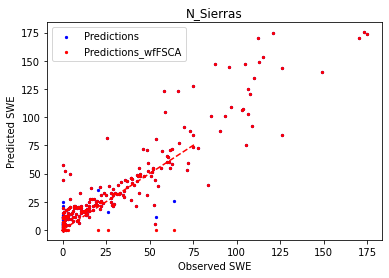

Preliminary Model Analysis for:  S_Sierras_High
 R2 is  0.9795341765152988
 RMSE is  6.710917500340906
 R2 fSCA is  0.9674334380055176
 RMSE fSCA is  8.465512288088707


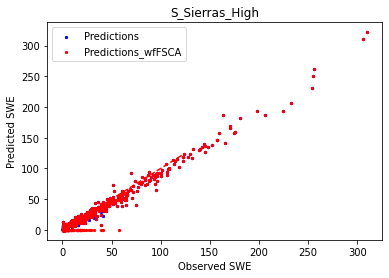

Preliminary Model Analysis for:  S_Sierras_Low
 R2 is  0.9714225541616784
 RMSE is  4.265552801811968
 R2 fSCA is  0.8646691709712822
 RMSE fSCA is  9.282436528567418


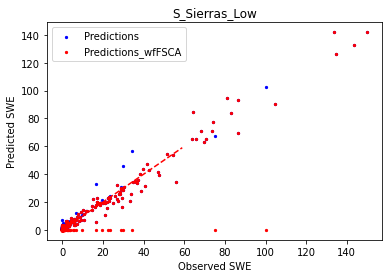

,Region,R2,RMSE,R2_fSCA,RMSE_fSCA
0,N_Sierras,0.78,17.11,0.77,17.36
1,S_Sierras_High,0.98,6.71,0.97,8.47
2,S_Sierras_Low,0.97,4.27,0.86,9.28


In [5]:
Performance = bls.Prelim_Eval(cwd, Predictions)
Performance